<a href="https://colab.research.google.com/github/Rajan0110/AILabNewRepo/blob/main/k-Mean%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Centroids:
 [[9.         2.33333333]
 [1.16666667 1.46666667]
 [7.33333333 9.        ]]
Labels:
 [1 1 2 2 1 2 0 0 0]


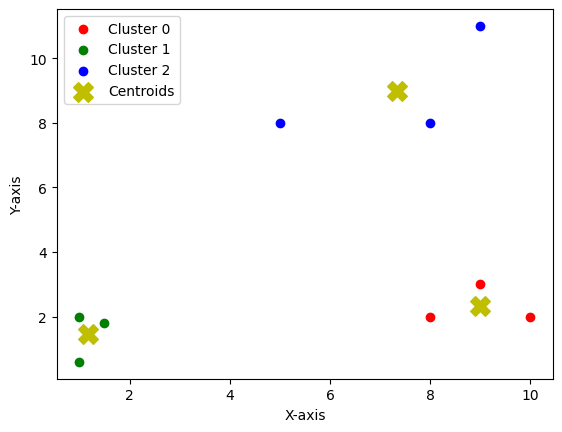

In [12]:
import numpy as np

class KMeans:
    def __init__(self, k=2, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol

    def fit(self, X):
        n_samples, n_features = X.shape


        np.random.seed(42)
        random_indices = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = X[random_indices]

        for i in range(self.max_iters):

            self.labels = self._assign_clusters(X)

            new_centroids = np.array([X[self.labels == j].mean(axis=0) for j in range(self.k)])

            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break

            self.centroids = new_centroids

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)


if __name__ == "__main__":

    X = np.array([
        [1, 2],
        [1.5, 1.8],
        [5, 8],
        [8, 8],
        [1, 0.6],
        [9, 11],
        [8, 2],
        [10, 2],
        [9, 3]
    ])

    k = 3
    kmeans = KMeans(k=k)
    kmeans.fit(X)

    print("Centroids:\n", kmeans.centroids)
    print("Labels:\n", kmeans.labels)

    import matplotlib.pyplot as plt
    colors = ['r', 'g', 'b']
    for i in range(k):
        plt.scatter(X[kmeans.labels == i][:,0], X[kmeans.labels == i][:,1], c=colors[i], label=f'Cluster {i}')
    plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], c='y', marker='X', s=200, label='Centroids')
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.show()
